# PROJECT NAME :- INSURANCE COST PREDICTION

### OBJECTIVE

#### We have been given a Insurance Data set and we have to complete the following activities

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:-

* 	Prepare the data, identifying and extracting key features (both input and output parameters) relevant to the problem you will      solve.
* 	Build and train a machine learning model. Here you can evaluate different algorithms, settings and see which model is best for your scenario.

Task 3:-  Create a machine learning model to predict the insurance price charged to the customer. 

__Dataset Details__
- age     : age of primary beneficiary 
- sex     : insurance contractor gender, female, male 
- bmi     : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
            objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 
- children: Number of children covered by health insurance / Number of dependents
- smoker  : Smoking
- region  : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges : Individual medical costs billed by health insurance

### Algoritms we are planning to test in this project for Prediction

* Linear Regression
* Decision Tree
* Random Forest
* Gradient Boosting
* K Nearest Neighbour
* XGBRegressor
* Ada Boost Regressor
* SVR

## Exploratory Data Analysis

#### Step 1 : Import data from file

In [445]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [446]:
data = pd.read_csv("datasets_13720_18513_insurance.csv")

#### Step 2 : Basic Checks

In [447]:
# checking the top five rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [448]:
# checking the bottom five rows of the dataset
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [449]:
# checking the number of rows and columns
data.shape

(1338, 7)

In [450]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


---------------------
### Initial Analysis

- There are total 7 columns with 1338 rows.
- There are no Null Values in any column. All column has same count of numbers.

__CATEGORICAL COLUMNS__ 

- sex

- smoker

- region


__NUMERICAL COLUMNS__

- age

- bmi

- children

- charges
    
__TARGET COLUMN__ = "__Charges__"

----------------------------------------

In [451]:
# Statistical measure of the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [452]:
# Statistical measure of the object dataset
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


#### Step 3 : Univariate Analysis

In [453]:
# Age Classification

data.loc[data.age >=18,'age_range'] = '18+'
data.loc[data.age >30,'age_range'] = '30+'
data.loc[data.age >40,'age_range'] = '40+'
data.loc[data.age >50,'age_range'] = '50+'
data.loc[data.age >60,'age_range'] = '60+'

data.age_range.value_counts()

18+    444
40+    281
50+    265
30+    257
60+     91
Name: age_range, dtype: int64

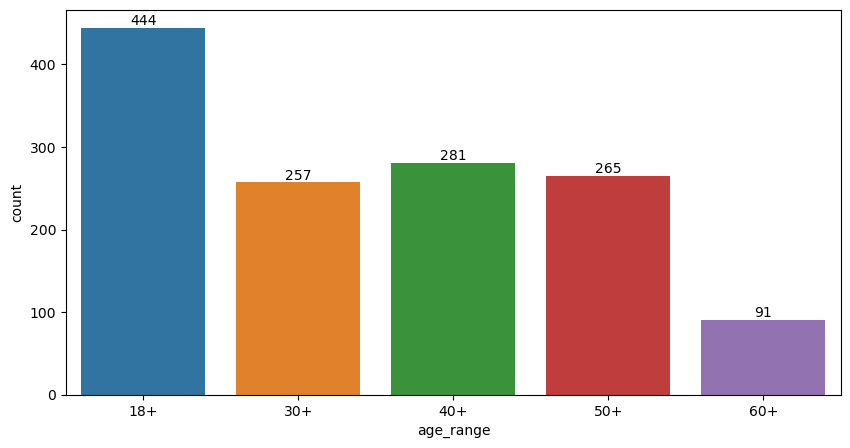

In [454]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(x = data.age_range)
ax.bar_label(ax.containers[0])
plt.show()

##### Age : 
1. Range is from 18 to 64 with mean of 39.
2. Max people lie between 18 to 30 bucket - 444
3. Only 91 people are above 60.
4. Count of 30+, 40+ and 50+ are nearly same.

In [455]:
# Sex
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

##### Sex :
1. Male and Female sample size is nearly same.

In [456]:
# BMI

data.loc[data.bmi <18.5,'bmi_range'] = 'Underweight '
data.loc[data.bmi >=18.5,'bmi_range'] = 'Healthy'
data.loc[data.bmi >24.9,'bmi_range'] = 'Overweight'
data.loc[data.bmi >29.9,'bmi_range'] = 'Obese'
data.loc[data.bmi >39.9,'bmi_range'] = 'Severely Obese'

data.bmi_range.value_counts()

Obese             623
Overweight        380
Healthy           222
Severely Obese     93
Underweight        20
Name: bmi_range, dtype: int64

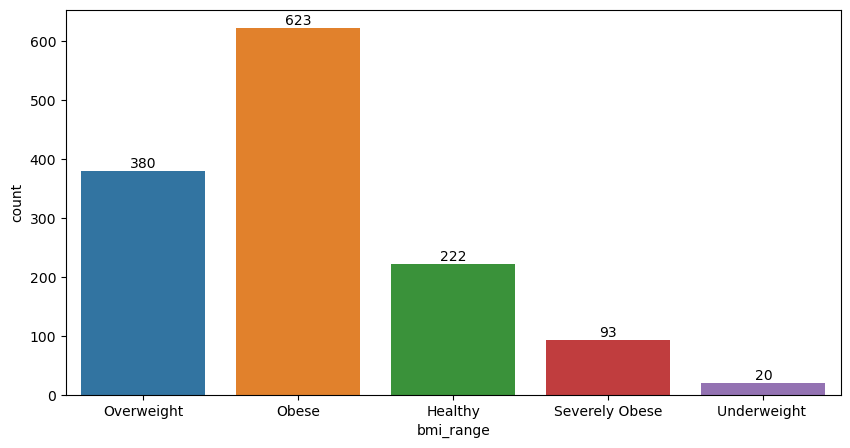

In [457]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(x = data.bmi_range)
ax.bar_label(ax.containers[0])
plt.show()

In [458]:
df_bmi = pd.DataFrame(data.bmi_range.value_counts())
df_bmi['Percent of Total'] = round((df_bmi.bmi_range/df_bmi.bmi_range.sum()) * 100,2)

df_bmi

,bmi_range,Percent of Total
Obese,623,46.56
Overweight,380,28.40
Healthy,222,16.59
Severely Obese,93,6.95
Underweight,20,1.49


##### BMI : 
1. 46% of population are Obese
2. Only 1.49% of population are underweight
3. Severely Obese population is comparatively very high (6.95%)
4. BMI also states that majority of the population (82%) are above healthy weight limits.

In [459]:
# Children

data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

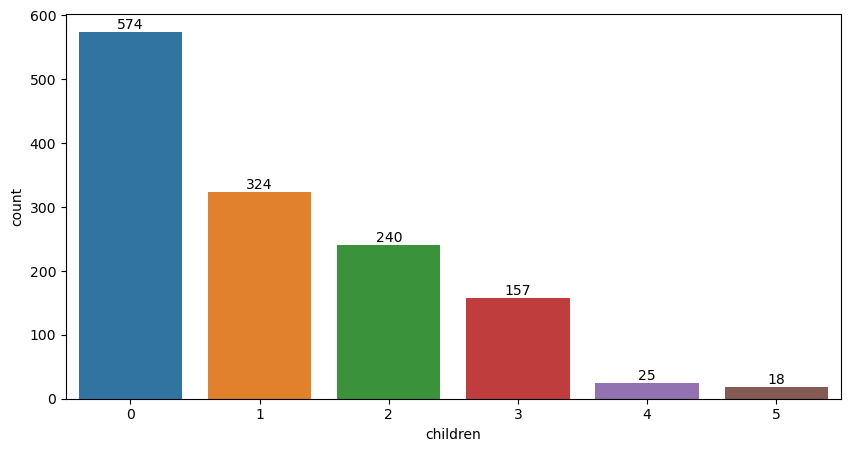

In [460]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(x = data.children)
ax.bar_label(ax.containers[0])
plt.show()

In [461]:
df_child = pd.DataFrame(data.children.value_counts())
df_child['Percent of Total'] = round((df_child.children/df_child.children.sum()) * 100,2)

df_child

,children,Percent of Total
0,574,42.90
1,324,24.22
2,240,17.94
3,157,11.73
4,25,1.87
5,18,1.35


##### Children :
1. 43% of the population are with no Childen
2. About 15% popuation have 3 or more Children
3. Among people with Children, 43% of population have only 1 Children

In [462]:
# Smoker

data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

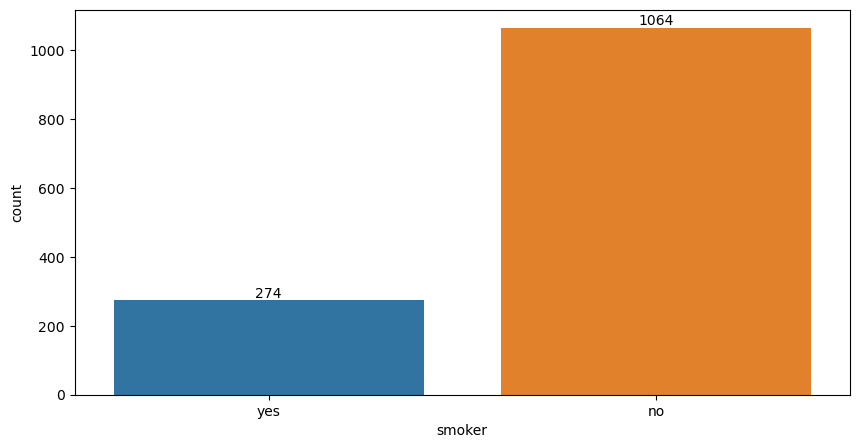

In [463]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(x = data.smoker)
ax.bar_label(ax.containers[0])
plt.show()

##### Smoker :
1. There are 2 categories - Smoker and Non Smoker.
2. About 20% of the population smokes.

In [464]:
# Region

df_region = data.region.value_counts()
df_region

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

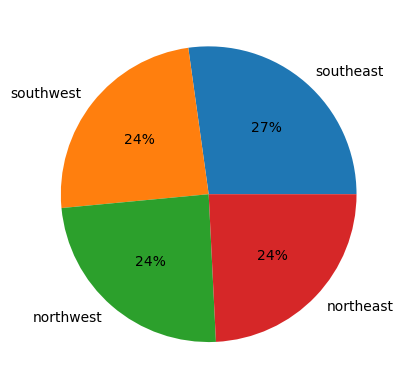

In [465]:
plt.pie(df_region, labels=df_region.index, autopct="%.0f%%")
plt.show()

#### Region : 
1. There are 4 regions - southeast, southwest , northwest , northeast
2. Data is equally distributed between 4 regions

#### Step 4 : BI Variate Analysis


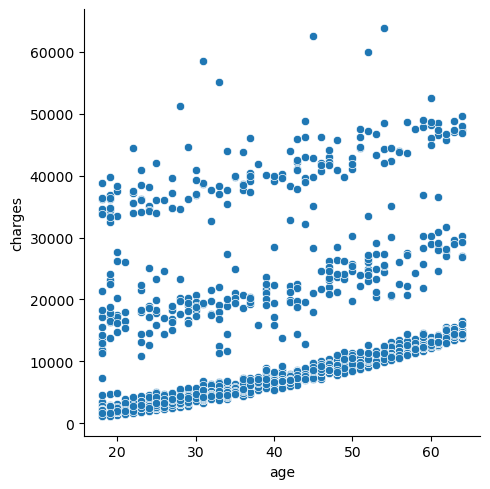

In [466]:
# Age with Charges

sns.relplot(x='age',y = 'charges', data=data )
plt.show()

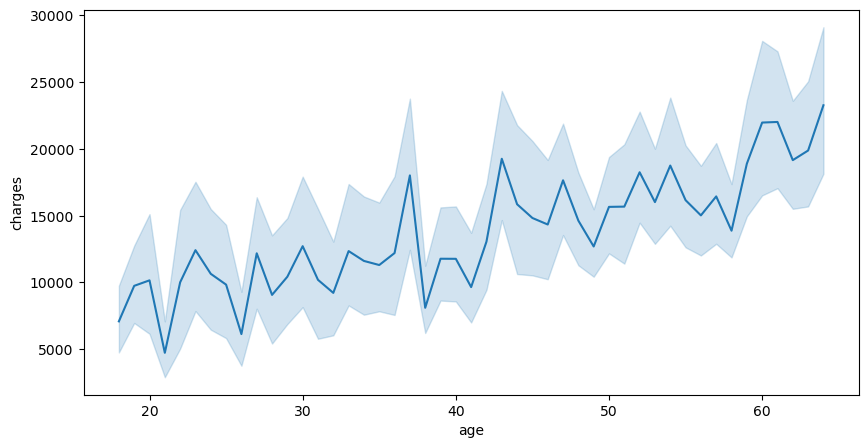

In [467]:
# Plotting the graph between charges and age column
plt.figure(figsize=(10,5))
sns.lineplot(x='age',y='charges',data=data)
plt.show()

###### Bivariate Analysis - Age/Charges

1. Charges increase with Age.

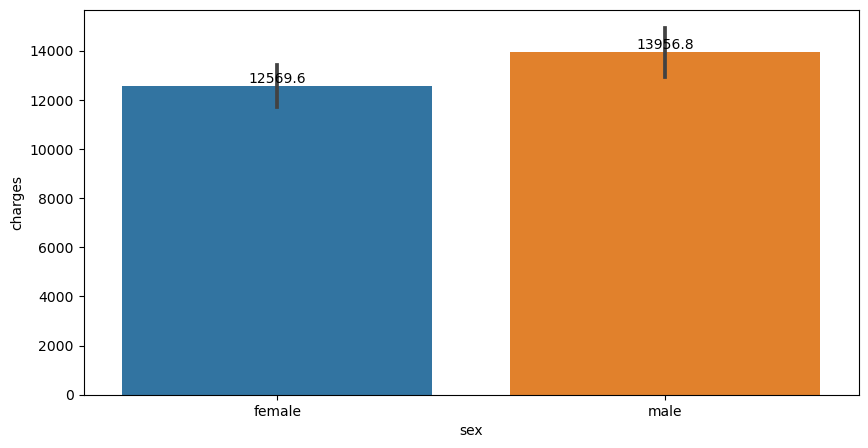

In [468]:
# Sex with Charges
## On average, Male are paying more charge than female
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=data, x='sex', y="charges")
ax.bar_label(ax.containers[0])
plt.show()

###### Bivariate Analysis - Gender/Charges
1. On average, Male are paying more charge than female

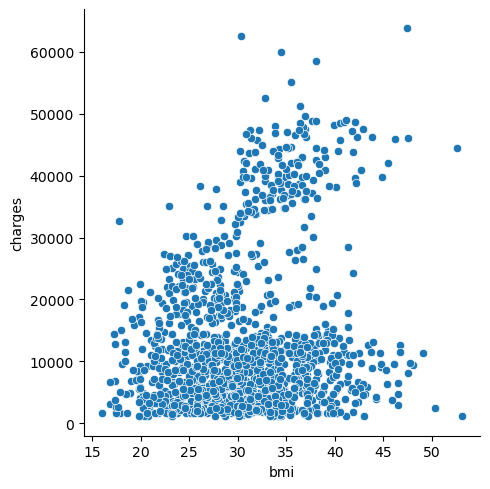

In [469]:
# BMI with Charges
sns.relplot(x='bmi',y = 'charges', data=data )
plt.show()

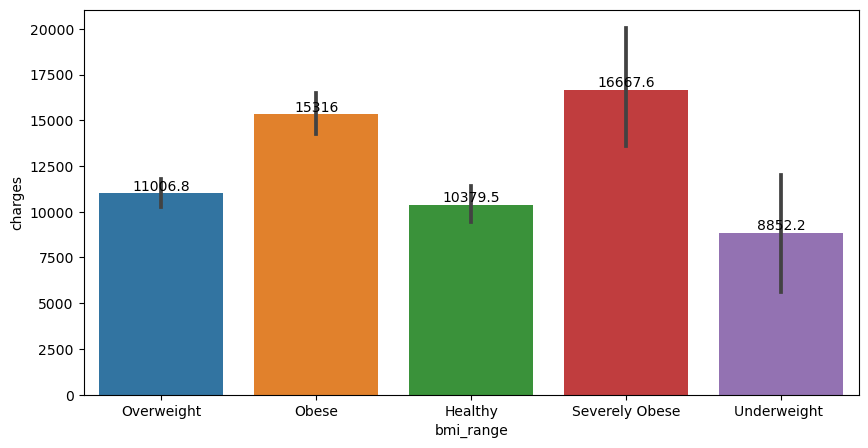

In [470]:
# BMI Range with Charges

fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=data, x='bmi_range', y="charges")
ax.bar_label(ax.containers[0])
plt.show()

###### Bivariate Analysis - BMI/Charges
1. Charges increases with BMI
2. Severely Obese and paying the most, followed by Obese
3. Underweight are paying the least

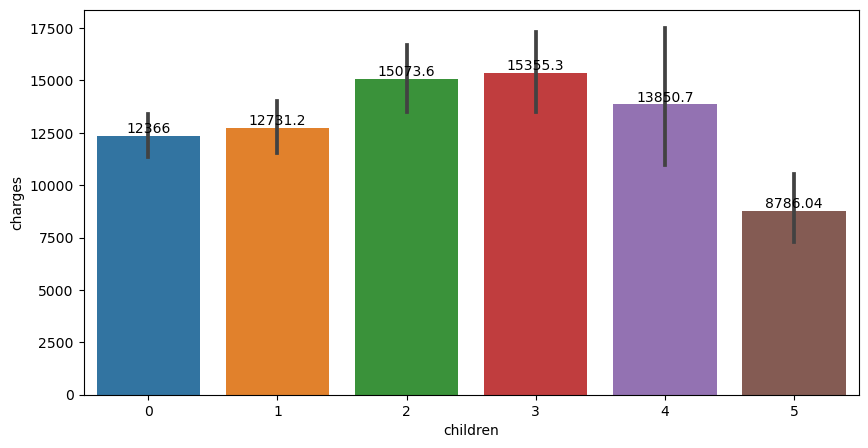

In [471]:
# children with Charges
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=data, x='children', y="charges")
ax.bar_label(ax.containers[0])
plt.show()

###### Bivariate Analysis - Children/Charges
1. On average, People with 2 or 3 kis are paying more charges
2. People with 5 kids are paying the least

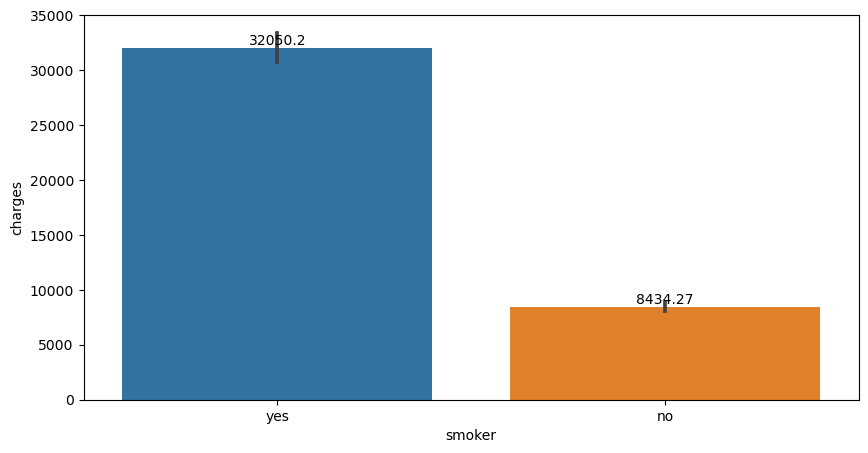

In [472]:
# Smoker with Charges
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=data, x='smoker', y="charges")
ax.bar_label(ax.containers[0])
plt.show()

###### Bivariate Analysis - Smoker/Charges
1. On average, Smokers ar paying lot more charges than non smoker

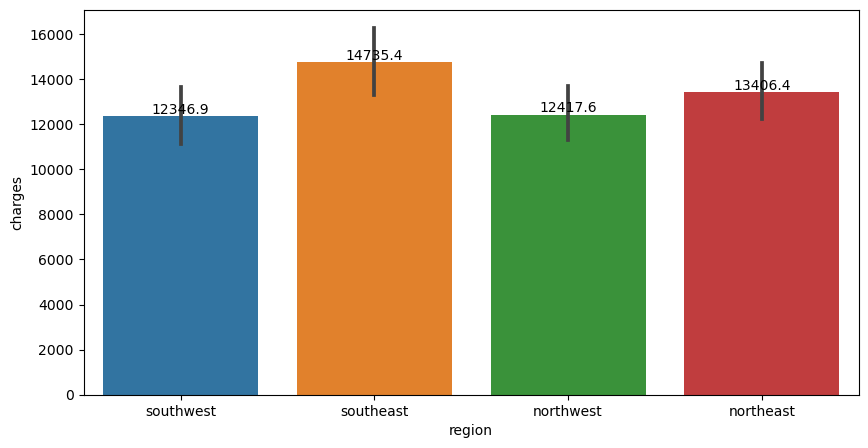

In [473]:
# Region with Charges
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=data, x='region', y="charges")
ax.bar_label(ax.containers[0])
plt.show()

###### Bivariate Analysis - Region/Charges
1. On average, SouthEast are paying more charge and south west the least.


#### Step 5 : Multivariate Analysis

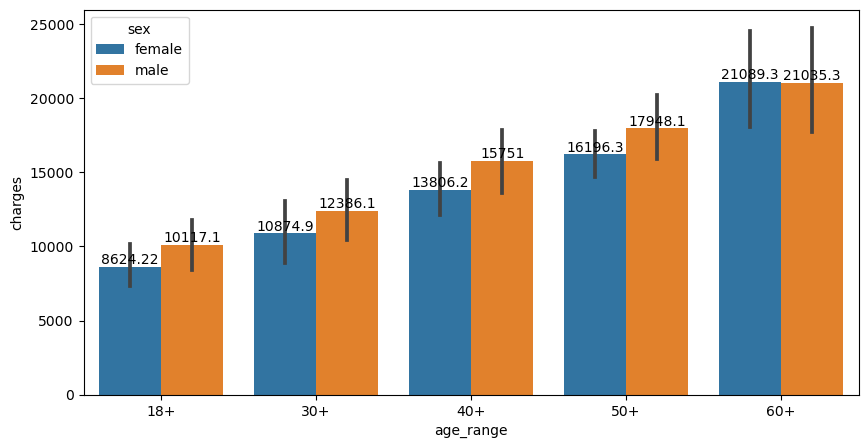

In [474]:
# Age with Charges by Sex

fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=data, x='age_range', y="charges",hue="sex")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

###### Multivariate Analysis
- Age/Sex by Charges
1. Male pays more than female till age 60
2. 60+ both male and female pays same

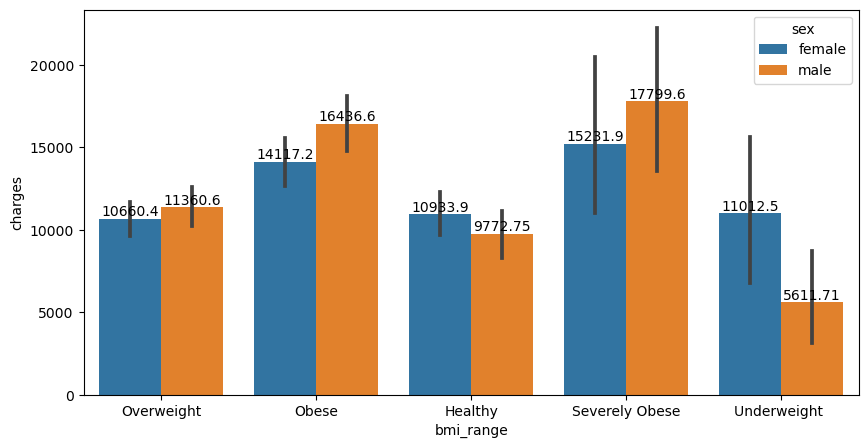

In [475]:
# BMI Range with Charges by Sex
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=data, x='bmi_range', y="charges",hue="sex")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

###### Multivariate Analysis
- BMI Range/Sex by Charges
1. In underweight section, Male pays much lesser than female. Female pays almost double of male
2. In Healthy section, Males pays less than female
3. In other sections - BMI above 25, Male pays more than female

## Data Preprocessing

#### Step 1. Missing Values

In [476]:
# Missing Values
## No Missing Values

data.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
age_range    0
bmi_range    0
dtype: int64

#### Step 2. Duplicate Values

In [477]:
# Checking for the row which is having the duplicate row
duplicate=data[data.duplicated(keep='first')]
duplicate

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
581,19,male,30.59,0,no,northwest,1639.5631,18+,Obese


In [478]:
duplicate=data[data.duplicated(keep='last')]
duplicate

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
195,19,male,30.59,0,no,northwest,1639.5631,18+,Obese


In [479]:
# Dropping the duplicate row
data=data.drop_duplicates()
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range


#### Step 3. Drop Unwanted Columns

In [480]:
## Removing Extra Unwanted columns
data= data.drop(['bmi_range','age_range'], axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [481]:
data.shape

(1337, 7)

#### Step 4. Outliers

<AxesSubplot:xlabel='age'>

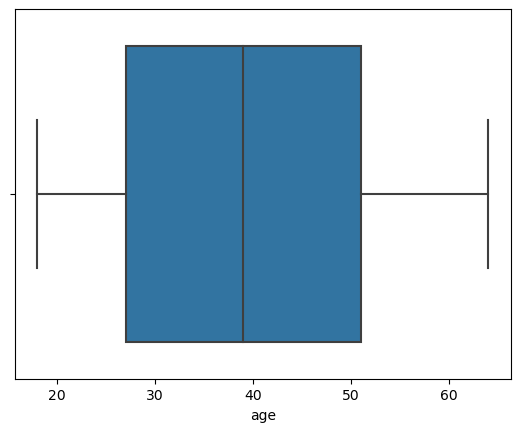

In [482]:
# Age
### No Outliers

sns.boxplot(x = 'age', data = data)

<AxesSubplot:xlabel='bmi'>

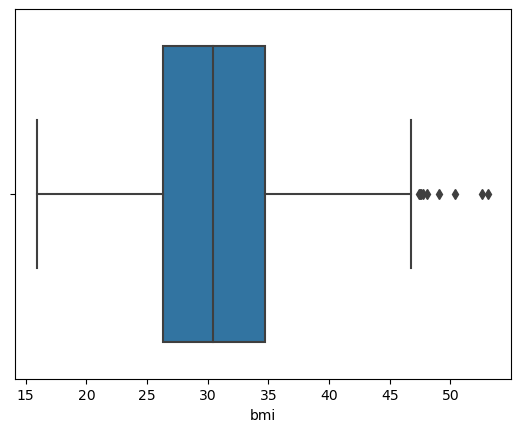

In [483]:
## BMI
## There are few outliers, so lets check there skewness and Kurtnosis
sns.boxplot(x = 'bmi', data = data)

In [484]:
from scipy import stats
 
print("Skewness : " , stats.skew(data.bmi))
print("Kurtonisis : " , stats.kurtosis(data.bmi, fisher = False))
# Data not sckewed
# kurtosis is neat 3. So, we are good.

Skewness :  0.2835955670169306
Kurtonisis :  2.9427662908999905


<AxesSubplot:xlabel='children'>

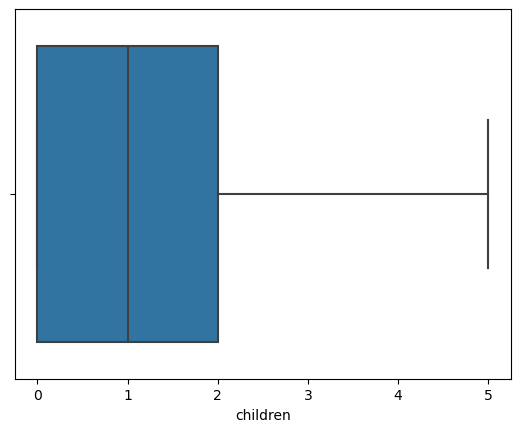

In [485]:
sns.boxplot(x = 'children', data = data)

In [486]:
print("Skewness : " , stats.skew(data.children))
print("Kurtonisis : " , stats.kurtosis(data.children, fisher = False))
# Skewness and Kurnosis is within permissible limit.

Skewness :  0.9363686100859417
Kurtonisis :  3.1957194094827344


#### Step 5 : Train Test Split

Rule of thumb: Split your dataset into train and test sets before you do any processing to the data. Otherwise there might be data leakage that makes model evaluation overly optimistic.

In [487]:
X = data.drop(['charges'],axis =1)
y = data.charges

In [488]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

X_train.reset_index(inplace = True)
X_test.reset_index(inplace = True)

X_train.drop('index', axis = 1, inplace= True)
X_test.drop('index', axis = 1, inplace= True)

In [489]:
X_train.count()

age         1069
sex         1069
bmi         1069
children    1069
smoker      1069
region      1069
dtype: int64

In [490]:
X_test.count()

age         268
sex         268
bmi         268
children    268
smoker      268
region      268
dtype: int64

#### Step 6 : Encoding


In [491]:
# ## Using label encoder to convert the categorical data to numerical data

# from sklearn.preprocessing import LabelEncoder
# lc=LabelEncoder()


# data.sex=lc.fit_transform(data.sex)
# data.smoker=lc.fit_transform(data.smoker)
# data.region=lc.fit_transform(data.region)

# data.head()

In [492]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

In [493]:
# Sex

#Fit
ohe.fit(X_train['sex'].astype(str).values.reshape(-1, 1))

#Train Transform
sex_train = ohe.transform(X_train['sex'].astype(str).values.reshape(-1, 1)).toarray()
df_sex_train = pd.DataFrame(data = sex_train, columns = ['sex_' + x  for x in (ohe.categories_[0])])
print(len(df_sex_train.columns))

#Test Transform
sex_test = ohe.transform(X_test['sex'].astype(str).values.reshape(-1, 1)).toarray()
df_sex_test = pd.DataFrame(data = sex_test, columns = ['sex_' + x  for x in (ohe.categories_[0])])
print(len(df_sex_test.columns))

2
2


In [494]:
df_sex_train.head()

,sex_female,sex_male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [495]:
# smoker

#Fit
ohe.fit(X_train['smoker'].astype(str).values.reshape(-1, 1))

#Train Transform
smoker_train = ohe.transform(X_train['smoker'].astype(str).values.reshape(-1, 1)).toarray()
df_smoker_train = pd.DataFrame(data = smoker_train, columns = ['smoker_' + x  for x in (ohe.categories_[0])])
print(len(df_smoker_train.columns))

#Test Transform
smoker_test = ohe.transform(X_test['smoker'].astype(str).values.reshape(-1, 1)).toarray()
df_smoker_test = pd.DataFrame(data = smoker_test, columns = ['smoker_' + x  for x in (ohe.categories_[0])])
print(len(df_smoker_test.columns))

2
2


In [496]:
df_smoker_train.head()

,smoker_no,smoker_yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [497]:
# region

#Fit
ohe.fit(X_train['region'].astype(str).values.reshape(-1, 1))

#Train Transform
region_train = ohe.transform(X_train['region'].astype(str).values.reshape(-1, 1)).toarray()
df_region_train = pd.DataFrame(data = region_train, columns = ['region_' + x  for x in (ohe.categories_[0])])
print(len(df_region_train.columns))

#Test Transform
region_test = ohe.transform(X_test['region'].astype(str).values.reshape(-1, 1)).toarray()
df_region_test = pd.DataFrame(data = region_test, columns = ['region_' + x  for x in (ohe.categories_[0])])
print(len(df_region_test.columns))

4
4


In [498]:
#Train
X_train = pd.concat([X_train,
                               df_sex_train,
                               df_smoker_train,
                               df_region_train,
                               ], axis=1, sort=False)

print(len(X_train.columns))

#Test
X_test = pd.concat([X_test,
                              df_sex_test,
                              df_smoker_test, 
                              df_region_test
                             ], axis=1, sort=False)

print(len(X_test.columns))

14
14


In [499]:
X_train.head()

,age,sex,bmi,children,smoker,region,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,52,female,37.40,0,no,southwest,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,52,male,30.20,1,no,southwest,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,19,male,34.40,0,no,southwest,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,18,female,27.28,3,yes,southeast,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,25,male,23.90,5,no,southwest,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Step 7 : Drop Unwanted Columns
We have encoded Sex, Smoker and Region. So, dropping these columns.

In [500]:
X_train = X_train.drop(['sex','smoker','region'],axis = 1)
print(len(X_train.columns))

X_test = X_test.drop(['sex','smoker','region'],axis = 1)
print(len(X_test.columns))

11
11


In [501]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,52,37.40,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,52,30.20,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,19,34.40,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,18,27.28,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,25,23.90,5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [502]:
data_train = pd.concat([X_train, 
                        y_train.reset_index().drop('index', axis = 1)
                        ], axis=1, sort=False)

In [503]:
data_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,52,37.400,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9634.53800
1,52,30.200,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,9724.53000
2,19,34.400,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1261.85900
3,18,27.280,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,18223.45120
4,25,23.900,5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5080.09600
...,...,...,...,...,...,...,...,...,...,...,...,...
1064,48,32.300,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,10043.24900
1065,18,35.200,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1727.54000
1066,26,29.450,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2897.32350
1067,24,33.345,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2855.43755


#### Step 8 : Correlation Check

<AxesSubplot:>

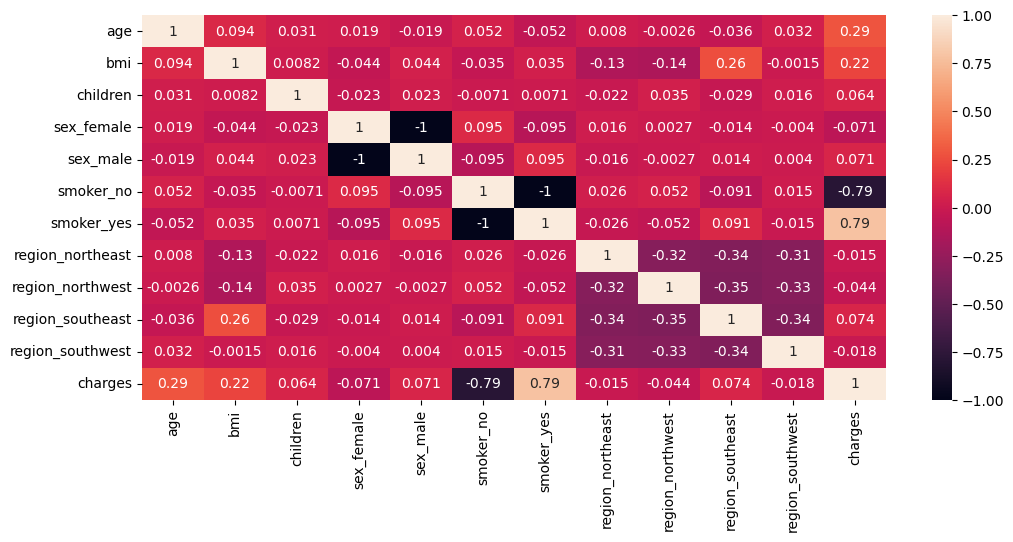

In [504]:
fig, ax = plt.subplots(figsize=(12,5))

sns.heatmap(data_train.corr(), annot=True)

----------
__Correlation Analysis__

1. Sex - Male and Female are corelated. So, we can remove 1 of them.
2. Smoker - Yes and No are corelated. So, we can remove 1 of them.
3. None of the region has any corellation with Charges. So, we can remove it.
4. Sex columns - Male and Female both has very less correlation with Charges. So, we can remove both.


* Since, we need to keep Train and Test Datasets have same columns, so we will drop the above columns from both dataset.

#### Step 9 : Drop Unimportant Columns

In [505]:
X_train = X_train.drop(['sex_male','sex_female','smoker_no','region_northwest','region_northeast',
                        'region_southwest','region_southeast'],axis = 1)
print(len(X_train.columns))

X_test = X_test.drop(['sex_male','sex_female','smoker_no','region_northwest','region_northeast',
                        'region_southwest','region_southeast'],axis = 1)
print(len(X_test.columns))

4
4


In [506]:
X_train.head()

,age,bmi,children,smoker_yes
0,52,37.40,0,0.0
1,52,30.20,1,0.0
2,19,34.40,0,0.0
3,18,27.28,3,1.0
4,25,23.90,5,0.0


#### Step 10 : Normalizing the Data

In [508]:
#FeatureScaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Model Evaluation

We will be evaluating different models and compare their R2 Scores.

In [509]:
# Linear Rgressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression

y_predict_lr=LR.predict(X_test)

# Step 4 Model Evalution


r2score_lr=r2_score(y_test,y_predict_lr)
r2score_lr

0.7245422218987343

In [510]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

regressor.fit(X_train,y_train)
y_predict_dt = regressor.predict(X_test)

r2score_dt=r2_score(y_test,y_predict_dt)
r2score_dt

0.6736003719150492

In [511]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor.fit(X_train,y_train)
y_predict_rf = regressor.predict(X_test)

r2score_rf=r2_score(y_test,y_predict_rf)
r2score_rf

0.8205522745561539

In [515]:
# GradientBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 100, random_state = 0)

gbr.fit(X_train,y_train)
y_predict_gbr = gbr.predict(X_test)

r2score_gbr=r2_score(y_test,y_predict_gbr)
r2score_gbr

0.861327088760354

In [323]:
#!pip3 install xgboost

In [516]:
# XGBoost Regressor
from xgboost import XGBRegressor

regressor = XGBRegressor()

regressor.fit(X_train,y_train)
y_predict_xgb = regressor.predict(X_test)

r2score_xgb=r2_score(y_test,y_predict_xgb)
r2score_xgb

0.8025230669379755

In [517]:
# SVM 
from sklearn.svm import SVR

sv_regressor = SVR()

sv_regressor.fit(X_train,y_train)
y_predict_svr = regressor.predict(X_test)

r2score_svr = r2_score(y_test,y_predict_svr )
r2score_svr

0.8025230669379755

In [518]:
## KNN Regressor

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

#prediction of testing data
y_predict_knn =knn.predict(X_test)

r2score_knn= r2_score(y_test,y_predict_knn)
r2score_knn

0.82206516559306

In [519]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(X_train,y_train)

y_predict_ada = ada.predict(X_test)
r2score_ada = r2_score(y_test,y_predict_ada)
r2score_ada

0.8565490548375424

## Model Hyperparameter Tuning

In [520]:
# Model Optimization : XGBRegressor 

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBRegressor(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 200, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.2, 'gamma': 51.2})


In [521]:
# XGBoost Regressor
from xgboost import XGBRegressor

regressor = XGBRegressor(reg_lambda = 200, reg_alpha = 0, n_estimators = 100, max_depth = 12, learning_rate = 0.2, gamma =51.2)

regressor.fit(X_train,y_train)
y_predict_xgb = regressor.predict(X_test)

r2score_xgb=r2_score(y_test,y_predict_xgb)
r2score_xgb

0.8515166090018956

In [522]:
### Model Optimization : RandomForest

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,65,80,100,115,130,150,200,250,300, 350],
    'max_depth': [5,6,7,8,9,10,11,12,13,14,20,50,75,100],
    'min_samples_split': [2, 3,4,6,8,10,12,15,18],
    'max_features': ['sqrt', 'log2','auto']
}

rfc = RandomForestRegressor()


grid = RandomizedSearchCV(rfc, param_distributions = param_grid, cv = 5, verbose = 5,n_iter=100, n_jobs = -1)
grid.fit(X_train, y_train)

best_estimator = grid.best_estimator_
best_estimator

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=3,
                      n_estimators=350)

In [523]:
rfc = RandomForestRegressor(max_depth=6, max_features='sqrt', min_samples_split=4,
                      n_estimators=50)

rfc.fit(X_train,y_train)
y_predict_rf = rfc.predict(X_test)

r2score_rf=r2_score(y_test,y_predict_rf)
r2score_rf

0.861528860891269

Text(0, 0.5, 'Error Rate')

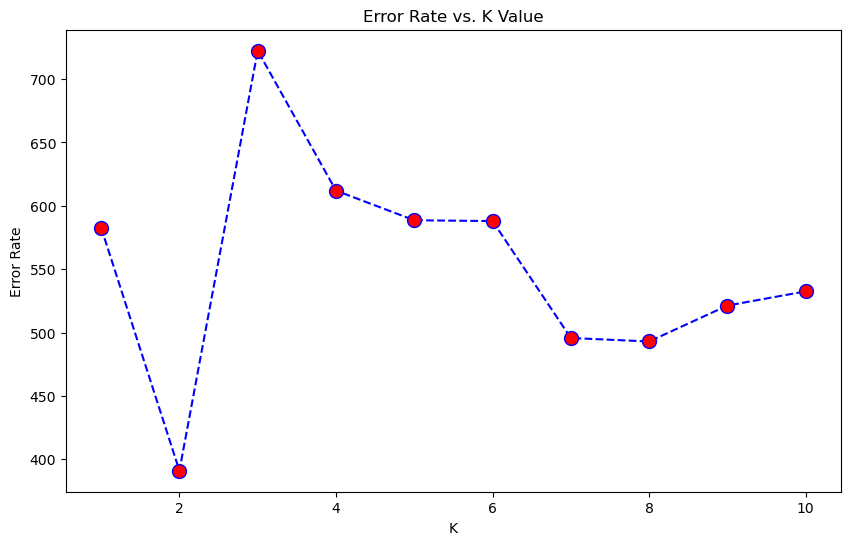

In [524]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i - y_test))
    
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [525]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)

#prediction of testing data
y_predict_knn =knn.predict(X_test)

r2score_knn= r2_score(y_test,y_predict_knn)
r2score_knn

0.8337966571748294

--------

After Hyperparameter Tuning

- XGBRegressor : After Tuning, R2 Score, improved by 5% (80% to 85%)
- RandomForest Regressor : After Tuning, R2 Score, improved by 4% (82% to 86.3%)
- KNN : After Tuning, R2 Score, improved by 1% (82% to 83%)

In [526]:
metric_results= {'Model': ['Linear Regression','Decision Tree','Random Forest',
                           'Gradient Boosting','XGBoost','SVM','KNeighbors','AdaBoost'], 
                 'R2 Score': [r2score_lr, r2score_dt, r2score_rf, r2score_gbr, r2score_xgb,
                             r2score_svr, r2score_knn, r2score_ada]}
                
metrics=pd.DataFrame(metric_results)
metrics

,Model,R2 Score
0,Linear Regression,0.724542
1,Decision Tree,0.673600
2,Random Forest,0.861529
3,Gradient Boosting,0.861327
4,XGBoost,0.851517
5,SVM,0.802523
6,KNeighbors,0.833797
7,AdaBoost,0.856549


-------------

 - __Decision Tree__ have the __lowest__ r sqaured value with the R2 Score of 67.3%
 - __Gradient Boosting__ and __Random Forest__ have __hightest__ r squared value with the R2 Score of 86%.

# Creating the new dataframe of the predicted values of the charges column 

Here, we are creating the new dataframe to compare the predicted values of the target columns i.e "charges" by creating the dictionary of predicted values with the algortihms that we used.

In [527]:
df_output=pd.DataFrame({'Actual':y_test,
                 'lr':y_predict_lr,
                 'dt':y_predict_dt,
                 'rf':y_predict_rf,
                 'gbr':y_predict_gbr,
                 'xgb':y_predict_xgb,
                 'svr':y_predict_svr,
                 'knn':y_predict_knn,
                 'ada':y_predict_ada})

In [528]:
df_output

,Actual,lr,dt,rf,gbr,xgb,svr,knn,ada
727,16657.71745,27032.824159,15006.57945,17939.724794,18168.006804,16314.869141,18565.261719,17073.686314,18659.715017
260,11837.16000,11284.893060,11070.53500,13263.067242,12622.888895,12941.413086,12138.779297,14311.554639,13875.401590
903,8125.78450,12710.275825,8798.59300,10809.312556,10994.015247,9025.848633,10688.418945,8651.853071,11681.621987
566,6373.55735,11434.012081,4762.32900,7305.631498,6664.972748,10585.743164,8732.727539,9346.314644,6969.258716
777,7448.40395,12607.089865,9704.66805,10344.669616,9589.029460,8624.084961,9075.083008,7654.878396,11169.468586
...,...,...,...,...,...,...,...,...,...
706,44400.40640,37921.287128,46255.11250,45614.351001,45869.408929,44868.085938,47220.195312,45108.239666,46238.985703
309,7749.15640,10228.071673,6338.07560,7721.038955,8331.353919,8148.107422,6588.710449,9543.722204,7313.798215
1184,18328.23810,27641.156757,35147.52848,22699.048260,20750.261038,22548.154297,26596.705078,20607.493179,18659.715017
1281,24535.69855,34325.930459,23401.30575,25670.329635,24072.661918,24747.419922,32265.695312,25025.521007,24895.241762


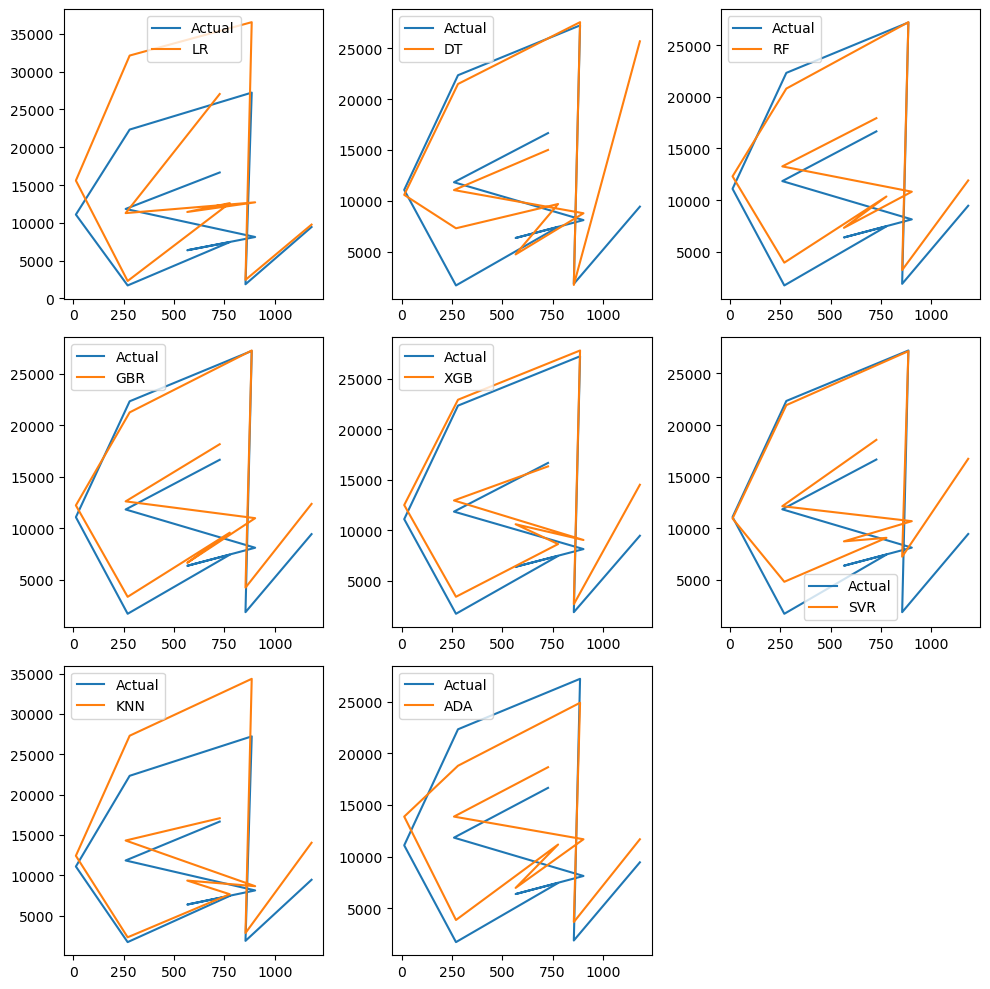

In [529]:
fig, ax = plt.subplots(figsize=(10,10))

plt.subplot(331)
plt.plot(df_output['Actual'].iloc[0:11],label='Actual')
plt.plot(df_output['lr'].iloc[0:11],label="LR")
plt.legend()

plt.subplot(332)
plt.plot(df_output['Actual'].iloc[0:11],label='Actual')
plt.plot(df_output['dt'].iloc[0:11],label="DT")
plt.legend()

plt.subplot(333)
plt.plot(df_output['Actual'].iloc[0:11],label='Actual')
plt.plot(df_output['rf'].iloc[0:11],label="RF")
plt.legend()

plt.subplot(334)
plt.plot(df_output['Actual'].iloc[0:11],label='Actual')
plt.plot(df_output['gbr'].iloc[0:11],label="GBR")
plt.legend()

plt.subplot(335)
plt.plot(df_output['Actual'].iloc[0:11],label='Actual')
plt.plot(df_output['xgb'].iloc[0:11],label="XGB")
plt.legend()

plt.subplot(336)
plt.plot(df_output['Actual'].iloc[0:11],label='Actual')
plt.plot(df_output['svr'].iloc[0:11],label="SVR")
plt.legend()

plt.subplot(337)
plt.plot(df_output['Actual'].iloc[0:11],label='Actual')
plt.plot(df_output['knn'].iloc[0:11],label="KNN")
plt.legend()

plt.subplot(338)
plt.plot(df_output['Actual'].iloc[0:11],label='Actual')
plt.plot(df_output['ada'].iloc[0:11],label="ADA")
plt.tight_layout()
plt.legend()

## Root Mean Square Error

In [530]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_score_lr = sqrt(mean_squared_error(y_test,y_predict_lr))
mse_score_dt = sqrt(mean_squared_error(y_test,y_predict_dt))
mse_score_rf = sqrt(mean_squared_error(y_test,y_predict_rf))
mse_score_gbr = sqrt(mean_squared_error(y_test,y_predict_gbr))
mse_score_xgb = sqrt(mean_squared_error(y_test,y_predict_xgb))
mse_score_svr = sqrt(mean_squared_error(y_test,y_predict_svr))
mse_score_knn = sqrt(mean_squared_error(y_test,y_predict_knn))
mse_score_ada = sqrt(mean_squared_error(y_test,y_predict_ada))

In [531]:
mse_results= {'Model': ['LinearRegression','Decision Tree Regressor','Random Forest','Gradient Boosting',
                            'XGB Regressor','SVM Regressor','KNeighbors','AdaBoost'], 
                  'Absolute Mean Error': [mse_score_lr,
                                         mse_score_dt,
                                         mse_score_rf,
                                         mse_score_gbr,
                                         mse_score_xgb,
                                         mse_score_svr,
                                         mse_score_knn,
                                         mse_score_ada]}
                
mse=pd.DataFrame(mse_results)
mse

,Model,Absolute Mean Error
0,LinearRegression,5881.521343
1,Decision Tree Regressor,6402.314217
2,Random Forest,4170.055064
3,Gradient Boosting,4173.092140
4,XGB Regressor,4318.183523
5,SVM Regressor,4979.896815
6,KNeighbors,4568.588419
7,AdaBoost,4244.376139


Ramdom Forest and Gradient Boost algorithm has the least Error.

### Predicting Charges For New Customer

In [532]:
import pickle

filename = 'trained_model.pkl'
pickle.dump(gbr,open(filename,'wb'))

# Loading the saved model
loaded_model = pickle.load(open('trained_model.pkl', 'rb'))

In [533]:
d = {'age':34,'bmi':31.92,'children':1,'smoker_yes':0}
df_new =pd.DataFrame(d,index=[0])
df_new

,age,bmi,children,smoker_yes
0,34,31.92,1,0


In [534]:
df_new = sc_X.transform(df_new)

/Users/anirbandas/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [538]:
prediction = loaded_model.predict(df_new)
print(prediction)

[16640.07498573]
